## Investigating Box Office Success: Disseminating Useful Knowledge for Microsoft's New Movie Studio

![](images/img3.jpg)

<span>Photo by <a href="https://unsplash.com/s/photos/microsoft">Matthew Manuel</a> on <a href="https://unsplash.com/s/photos/microsoft">Unsplash</a></span>

#### Overview

In this project will use exploratory data analysis in order to determine what kinds of movies are currently performing the best at the box office and to provide suggestions for what kinds of movies to produce.

### Business Understanding

Our job is to investigate box office successes as we work to establish a prosperous film company. We will get insightful information that will help the head of Microsoft's new movie studio choose the kinds of movies to produce by thoroughly analyzing the existing landscape of film industry successes. These conclusions will act as benchmarks to direct the studio toward fruitful endeavors

Our main goal is to investigate and evaluate the kinds of movies that are now dominating the box office. To do this, we must examine trends, patterns, and contributors to commercial success across a range of genres.

The ability of the research's insights to be transformed into decisions that can be implemented will be one of the success factors. These data should enable the CEO of Microsoft's movie studio to make well-informed decisions about the kinds of movies to develop, the partnerships to pursue, and the marketing tactics to use.


### Data Understanding

Generally we could use many data sources but for this analysis will use information from these different files and databases as data sources.

#### `im.db`

* **Source**: This dataset comes from [`im.db.zip`](https://github.com/learn-co-curriculum/dsc-phase-1-project-v2-4/blob/master/zippedData/im.db.zip), where we extracted the database from the zip file.
* **Contents**: it contains information and statistics about movies, TV shows and video games as well as actors, directors and other film industry professionals.
* **Format**:  

#### `bom.movie_gross.csv`

* **Source**: This dataset comes from [`bom.movie_gross.csv.gz`](https://github.com/learn-co-curriculum/dsc-phase-1-project-v2-4/blob/master/zippedData/bom.movie_gross.csv.gz), where we extracted the csv file.
* **Contents**: Data about titles of movies,their production studios,the gross revenue generated by the movie both locally and internationally and the production year.
* **Format**:  plain text file that has tabular data in a structured format having rows and columns and field values.

##### Collecting the Data

In [1]:
#importing the necessary libraries
import pandas as pd
import sqlite3

First we look at the tables that are in the database and peruse through to see if there are tables that might have information we need.

In [2]:
#printing out the tables we have in our database
conn = sqlite3.connect('Data/im.db')
query = "SELECT name FROM sqlite_master WHERE type='table';"
df = pd.read_sql_query(query, conn)
conn.close()

table_names = df['name'].values
# Perform operations on the DataFrame
print(table_names)

['movie_basics' 'directors' 'known_for' 'movie_akas' 'movie_ratings'
 'persons' 'principals' 'writers']


Here we are replacing the words after FROM with table names to see which tables may have information we need.

In [3]:
conn = sqlite3.connect('Data/im.db')
query = "SELECT * FROM movie_basics"
df3 = pd.read_sql_query(query, conn)
conn.close()

df3.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
conn = sqlite3.connect('Data/im.db')
query = "SELECT * FROM movie_ratings"
df = pd.read_sql_query(query, conn)
conn.close()

df.columns

Index(['movie_id', 'averagerating', 'numvotes'], dtype='object')

From the above findings we tend to go with the movie_rating table as it has the average rating that we can use to see which genre is doing good in the film industry.We can also get some important information from movie_basics table.

### Data Preparation

First we join the relevant tables from the im.db file for us to get a data frame that has the ratings and the genre.

In [6]:
#we select the columns we need from each data frame
df1_selected = df3[['movie_id', 'original_title','genres']]
df2_selected = df[['movie_id', 'averagerating']]

# Performing the join
merged_df = pd.merge(df1_selected, df2_selected, on='movie_id')
merged_df.head()

,movie_id,original_title,genres,averagerating
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0
1,tt0066787,Ashad Ka Ek Din,"Biography,Drama",7.2
2,tt0069049,The Other Side of the Wind,Drama,6.9
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1
4,tt0100275,La Telenovela Errante,"Comedy,Drama,Fantasy",6.5


Because we have similar values in the original_title column and title column in the bom.movies_gross.csv,we can join the two together to make comparison more easy.

In [7]:
merged_df2 = pd.merge(df2, merged_df, left_on='title', right_on='original_title', how='inner')
merged_df2.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,original_title,genres,averagerating
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,"Adventure,Animation,Comedy",8.3
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,"Adventure,Animation,Comedy",6.3
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy",5.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,"Action,Adventure,Sci-Fi",7.0


Since we have the title column we can drop the original title column.

In [8]:
merged_df2 = merged_df2.drop('original_title', axis=1)
merged_df2.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,genres,averagerating
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,"Adventure,Animation,Comedy",8.3
1,Inception,WB,292600000.0,535700000,2010,tt1375666,"Action,Adventure,Sci-Fi",8.8
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,"Adventure,Animation,Comedy",6.3
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,"Adventure,Drama,Fantasy",5.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,"Action,Adventure,Sci-Fi",7.0


Now we check for null values and duplicates

In [9]:
merged_df2.shape

(2447, 8)

In [10]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2447 non-null   object 
 1   studio          2444 non-null   object 
 2   domestic_gross  2429 non-null   float64
 3   foreign_gross   1573 non-null   object 
 4   year            2447 non-null   int64  
 5   movie_id        2447 non-null   object 
 6   genres          2443 non-null   object 
 7   averagerating   2447 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 172.1+ KB


Because we will be using a sample from this data set we will be dropping rows where the value is null for particular columns.Alternatively we could replace the values where the values are intergers or float with the mean or median. 

Here we are dropping the null values in foriegn_gross to standardize the data set because replacing the null values with either mean or median would shift the overall analysis towards that mean/median because the number of null values is great.

In [11]:
merged_df2 = merged_df2.dropna(subset=['foreign_gross'])
merged_df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1573 entries, 0 to 2435
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1573 non-null   object 
 1   studio          1571 non-null   object 
 2   domestic_gross  1555 non-null   float64
 3   foreign_gross   1573 non-null   object 
 4   year            1573 non-null   int64  
 5   movie_id        1573 non-null   object 
 6   genres          1569 non-null   object 
 7   averagerating   1573 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 110.6+ KB


When we look at the foreign_gross we see that the data type of the column is object meaning the computer interpretes the values in that column as strings.But before that, we have values in the foreign_gross column that are separated by a comma ie. 1,234.0 .Because they are a few we can get rid of rows bearing such values.

In [12]:
import re
numbers = list(merged_df2['foreign_gross'])
filtered_numbers = [num for num in numbers if re.search(r',', num)]
merged_df2 = merged_df2[~merged_df2['foreign_gross'].str.contains('|'.join(filtered_numbers))]
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 0 to 2435
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1570 non-null   object 
 1   studio          1568 non-null   object 
 2   domestic_gross  1552 non-null   float64
 3   foreign_gross   1570 non-null   object 
 4   year            1570 non-null   int64  
 5   movie_id        1570 non-null   object 
 6   genres          1566 non-null   object 
 7   averagerating   1570 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 110.4+ KB


Now we convert the data type of foreign_gross to float or integer.

In [13]:
merged_df2['foreign_gross'] = merged_df2['foreign_gross'].astype(float)
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1570 entries, 0 to 2435
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1570 non-null   object 
 1   studio          1568 non-null   object 
 2   domestic_gross  1552 non-null   float64
 3   foreign_gross   1570 non-null   float64
 4   year            1570 non-null   int64  
 5   movie_id        1570 non-null   object 
 6   genres          1566 non-null   object 
 7   averagerating   1570 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 110.4+ KB


In [14]:
#standardizing the data set to have no columns with null values
merged_df2 = merged_df2.dropna(subset=['domestic_gross'])
merged_df2 = merged_df2.dropna(subset=['genres'])
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 2435
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           1548 non-null   object 
 1   studio          1548 non-null   object 
 2   domestic_gross  1548 non-null   float64
 3   foreign_gross   1548 non-null   float64
 4   year            1548 non-null   int64  
 5   movie_id        1548 non-null   object 
 6   genres          1548 non-null   object 
 7   averagerating   1548 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 108.8+ KB


In [15]:
df_sample = merged_df2.sample(300,random_state=1)
df_sample.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,genres,averagerating
624,The Man with the Iron Fists,Uni.,15600000.0,4099999.0,2012,tt1258972,Action,5.4
298,Hall Pass,WB (NL),45100000.0,38100000.0,2011,tt0480687,"Comedy,Romance",5.9
412,Armadillo,Lorb.,14600.0,2000000.0,2011,tt1640680,"Documentary,War",7.5
926,Journey to the South Pacific,Imax,7600000.0,6500000.0,2013,tt3195742,Documentary,6.5
260,Limitless,Rela.,79200000.0,82600000.0,2011,tt1219289,"Mystery,Sci-Fi,Thriller",7.4


### Analysing the Data

With the cleaned data from above we can now try to answer the questions 

"Which types of films are currently doing the best at the box office ?"

"Which types of films are we more inclined to make ?"


Since we are looking for the 'type of film' our focus should now be on the genre because now we can compare between the genre and other factors.

First we look the genre and average rating to know the audience attitude towards certain genres.We can do this by grouping the cleaned data set by genres to bring together similar genres with their rating.

In [18]:
sorted1_df = df_sample.sort_values(by='genres')
sorted1_df.head()

,title,studio,domestic_gross,foreign_gross,year,movie_id,genres,averagerating
624,The Man with the Iron Fists,Uni.,15600000.0,4099999.0,2012,tt1258972,Action,5.4
2133,Collide,ORF,2300000.0,2500000.0,2017,tt1230120,Action,5.5
1753,Kubo and the Two Strings,Focus,48000000.0,21900000.0,2016,tt4302938,"Action,Adventure,Animation",7.8
223,Kung Fu Panda 2,P/DW,165200000.0,500400000.0,2011,tt1302011,"Action,Adventure,Animation",7.2
810,The Croods,Fox,187200000.0,400000000.0,2013,tt0481499,"Action,Adventure,Animation",7.2
...,...,...,...,...,...,...,...,...
260,Limitless,Rela.,79200000.0,82600000.0,2011,tt1219289,"Mystery,Sci-Fi,Thriller",7.4
240,Super 8,Par.,127000000.0,133100000.0,2011,tt1650062,"Mystery,Sci-Fi,Thriller",7.0
501,Aurora,CGld,5700.0,5100.0,2011,tt2208216,"Romance,Sci-Fi,Thriller",6.1
473,Road to Nowhere,Mont.,40300.0,121000.0,2011,tt1504319,"Romance,Thriller",5.5


We then get the average of the ratings per unique value in genres.

In [19]:
new_df = df_sample.groupby('genres')['averagerating'].mean().reset_index()
new_df.head()

,genres,averagerating
0,Action,5.450
1,"Action,Adventure,Animation",7.375
2,"Action,Adventure,Biography",6.900
3,"Action,Adventure,Comedy",6.400
4,"Action,Adventure,Crime",6.500
...,...,...
114,"Horror,Thriller",5.940
115,"Mystery,Sci-Fi,Thriller",7.200
116,"Romance,Sci-Fi,Thriller",6.100
117,"Romance,Thriller",5.500


With the above data we can plot genre against average rating to see how different types of genres vary with rating.


Text(0.5, 1.0, 'Distribution of genres by average rating')

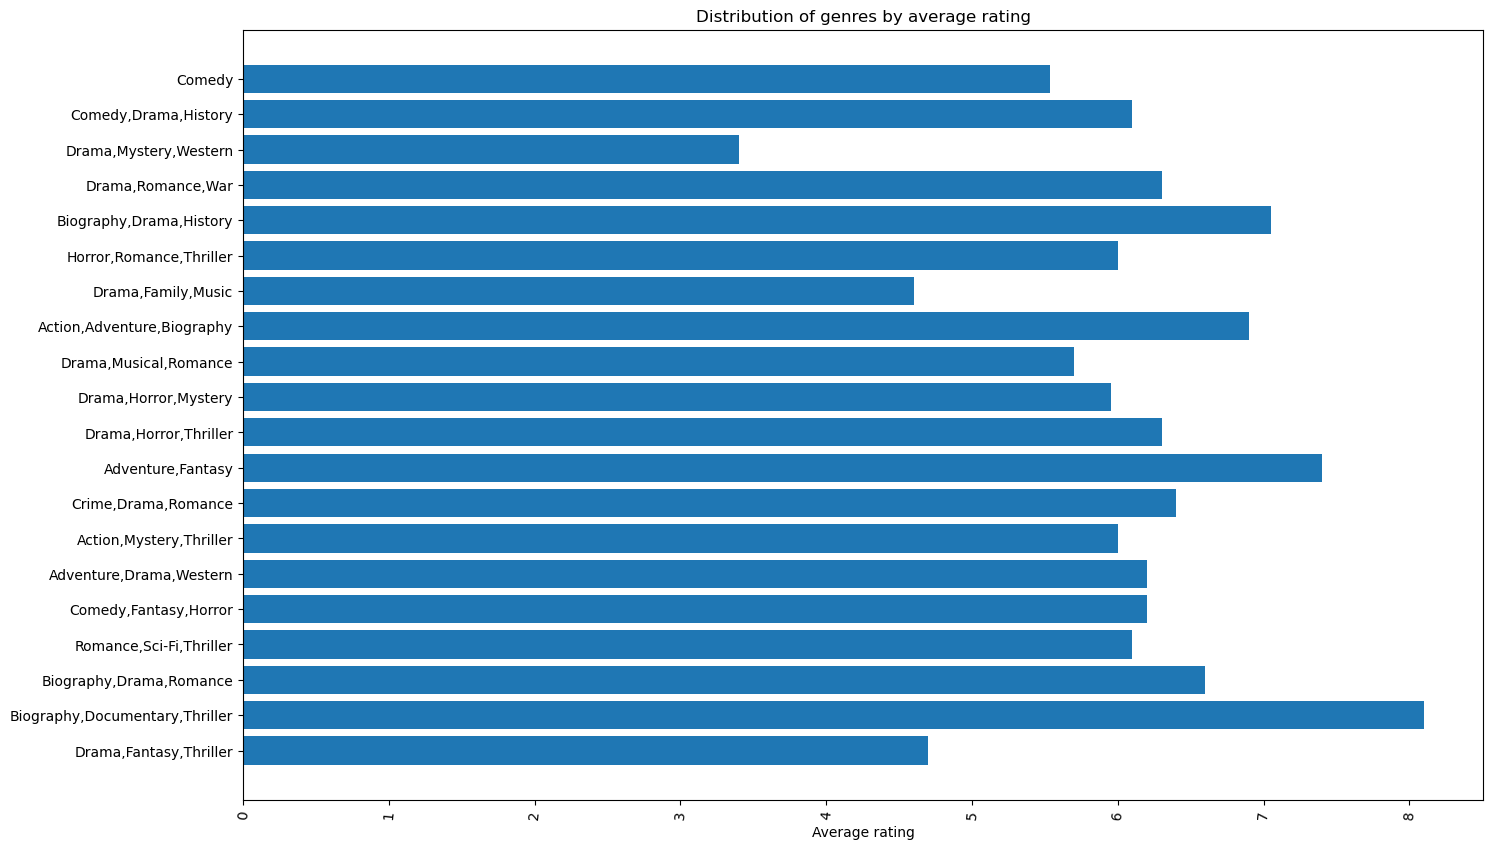

In [20]:
#collecting sample from the above data
smpl1 = new_df.sample(20,random_state=1)

import matplotlib.pyplot as plt
%matplotlib inline

# Set up plots
fig, ax = plt.subplots(figsize=(16, 10))

x = smpl1['genres']
y = smpl1['averagerating']

ax.barh(x,y)

ax.tick_params(axis="x", labelrotation=85)
ax.set_xlabel("Average rating")
ax.set_title("Distribution of genres by average rating")

After getting the average of the ratings per unique value we arrange the data frame in descending order to get which type of genre has the highest avarege rating.

In [68]:
# Sorting the DataFrame in descending order based on values in averagerating
sorted_df2 = new_df.sort_values(by='averagerating', ascending=False)
sorted_df2.head()


Next we check check how much the genres produce in terms of gross income both locally and internationally.

In [22]:
new_df2 = df_sample.groupby('genres')['domestic_gross'].mean().reset_index()
new_df2.head()

,genres,domestic_gross
0,Action,8950000.0
1,"Action,Adventure,Animation",119500000.0
2,"Action,Adventure,Biography",25000000.0
3,"Action,Adventure,Comedy",175700000.0
4,"Action,Adventure,Crime",38600000.0


In [23]:
new_df3 = df_sample.groupby('genres')['foreign_gross'].mean().reset_index()
new_df3.head()

,genres,foreign_gross
0,Action,3.300000e+06
1,"Action,Adventure,Animation",3.046750e+08
2,"Action,Adventure,Biography",6.890000e+07
3,"Action,Adventure,Comedy",2.454667e+08
4,"Action,Adventure,Crime",4.670000e+07


In [24]:
new_df4 = pd.merge(new_df3,new_df2,on='genres')
new_df5 = new_df4.head(10)

Here we are plotting both the domestic and foreign gross in the same chart to compare both according to each genre.

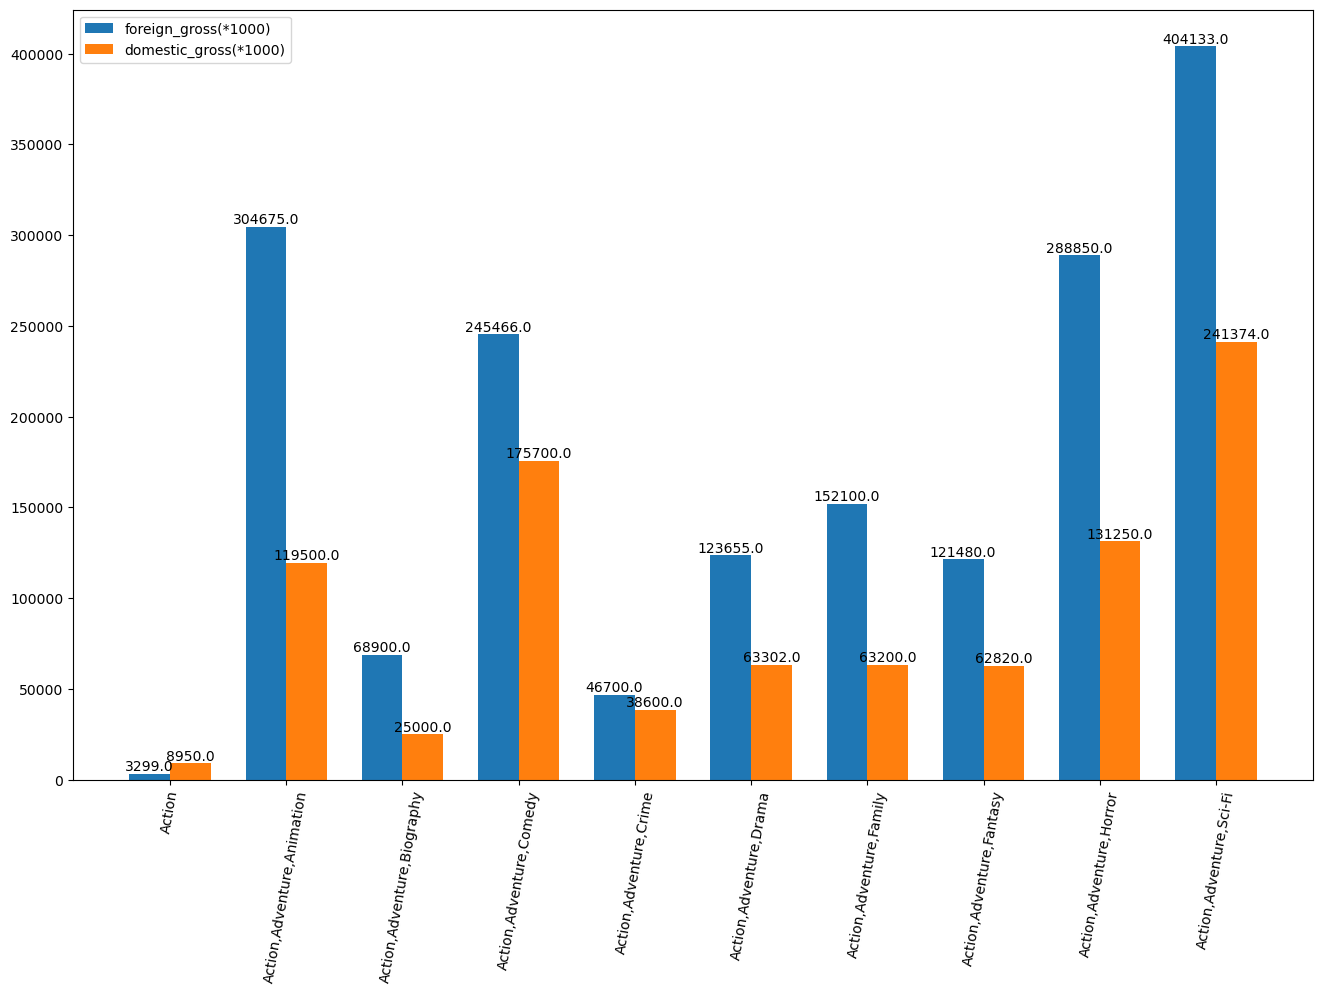

In [25]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(16, 10))
# Data for the bars
x_ticks = new_df5['genres']
bar_labels = ['foreign_gross(*1000)', 'domestic_gross(*1000)']  
bar_values_1 = [g//1000 for g in new_df5['foreign_gross']]
bar_values_2 = [n//1000 for n in new_df5['domestic_gross']]

# Set the width of each bar
bar_width = 0.35

# Calculate the position of each bar on the x-axis
f = np.arange(len(x_ticks))

# Plotting the bars
plt.bar(f - bar_width/2, bar_values_1, width=bar_width, label=bar_labels[0])
plt.bar(f + bar_width/2, bar_values_2, width=bar_width, label=bar_labels[1])

# Adding labels to the bars
for i in range(len(x_ticks)):
    plt.text(f[i] - bar_width/2, bar_values_1[i], str(bar_values_1[i]), ha='center', va='bottom')
    plt.text(f[i] + bar_width/2, bar_values_2[i], str(bar_values_2[i]), ha='center', va='bottom')

# Adding ticks and tick labels to the x-axis
plt.xticks(f, x_ticks)
plt.xticks(rotation=80)


plt.legend()

# Displaying the bar graph
plt.show()

In [90]:
# 119 * 4 genres	foreign_gross	domestic_gross	overall_gross
new_df6=new_df4
new_df6['overall_gross']=new_df6['foreign_gross'] + new_df6['domestic_gross']
new_df6=new_df6.sort_values(by='overall_gross', ascending=False)
new_df6.head()

,genres,foreign_gross,domestic_gross,overall_gross
48,"Adventure,Fantasy",7.009000e+08,2.551000e+08,9.560000e+08
9,"Action,Adventure,Sci-Fi",4.041333e+08,2.413750e+08,6.455083e+08
45,"Adventure,Drama,Sci-Fi",4.017000e+08,2.284000e+08,6.301000e+08
35,"Adventure,Animation,Comedy",4.082111e+08,2.158556e+08,6.240667e+08
58,"Biography,Drama,Musical",2.607000e+08,1.743000e+08,4.350000e+08


In [148]:
tse=sorted1_df[['genres','year','domestic_gross']]
d=tse['genres'].value_counts()

tsd=tse[:1]
for value,count in d.items():
    if count==5:
        dt=tse[tse['genres']== f'{value}']
        tsd=pd.concat([dt,tsd],axis=0)
 

2010

In [145]:
Action_Adventure_Fantasy=tsd.head()
Action_Comedy_Crime=tsd[5:10] 
Horror_Thriller=tsd[10:15]

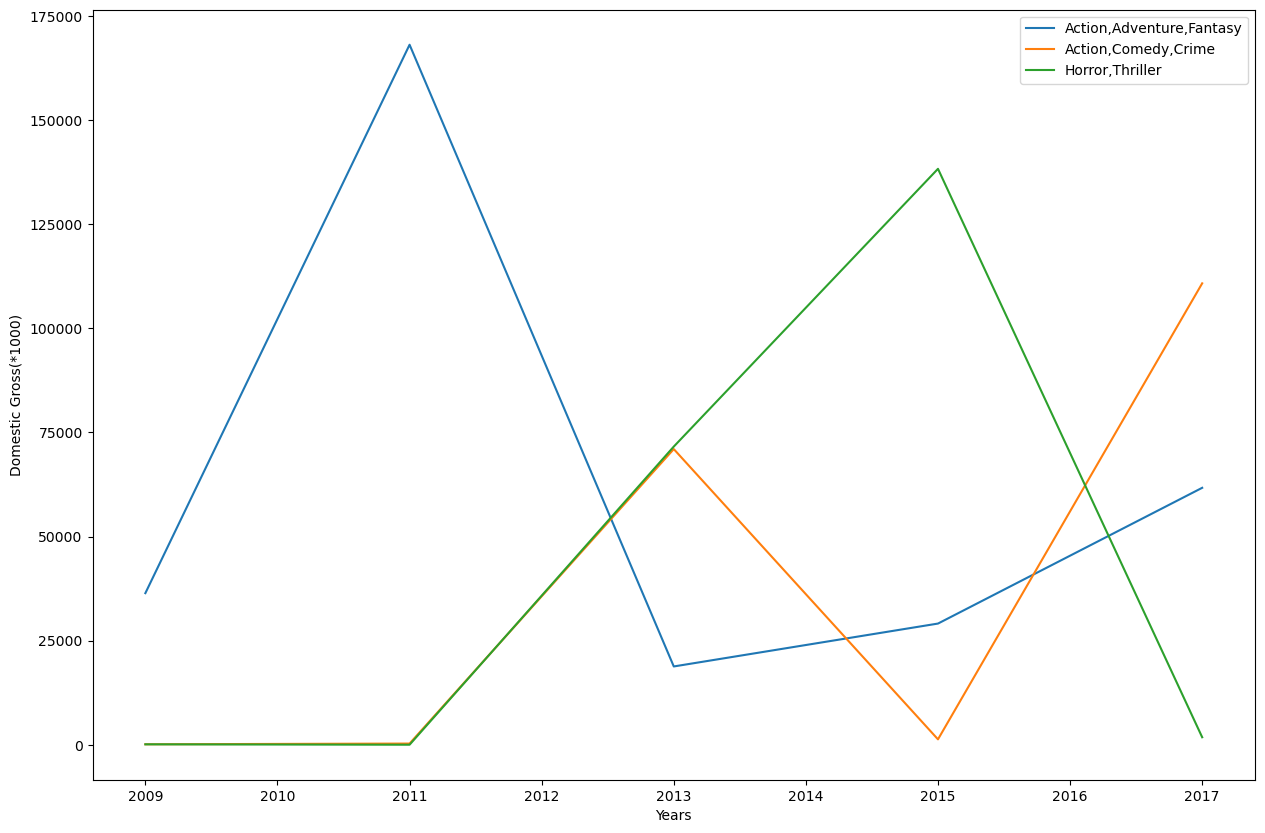

In [158]:
import matplotlib.pyplot as plt

x=[2009,2011,2013,2015,2017]
ya=[i/1000 for i in Action_Adventure_Fantasy['domestic_gross']]
yb=[i/1000 for i in Action_Comedy_Crime['domestic_gross']]
yc=[i/1000 for i in Horror_Thriller['domestic_gross']]

fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(x, ya, label='Action,Adventure,Fantasy')
ax.plot(x, yb, label='Action,Comedy,Crime')
ax.plot(x, yc, label='Horror,Thriller')

ax.set_xlabel('Years')

ax.set_ylabel('Domestic Gross(*1000)')


ax.legend()

plt.show()

s d yudgiqygasd